In [1]:
Names = 'Titus Jungao and Jude Teves'

In [2]:
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df_bikesharing = pd.read_excel('Bike_Sharing_day.xlsx', sheetname="day")
dummy=df_bikesharing
dummy.head()

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
df_UPCAT = pd.read_excel('UPCAT_DATA2.xlsx', sheetname='AllData')
dummy = df_UPCAT
dummy.head()

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


In [5]:
feature_names = ['Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2']

X = df_UPCAT[feature_names]
y = df_UPCAT['Target']
X.insert(loc=0, column='biased', value=1.0)

In [6]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(X)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

biased    0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
dtype: int64

UPCAT dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
X = sscaler.fit_transform(X_clean)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = np.array(y_train, ndmin=2).T

Bike Sharing dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_features=dummy.drop('count', axis=1)
df_features=df_features.drop('instant', axis=1)
df_features=df_features.drop('dteday', axis=1)
len(df_features)
df_features.head(5)

X = df_features
y = dummy['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

y_train = np.array(y_train, ndmin=2).T
y_test = np.array(y_test, ndmin=2).T

scalerX = StandardScaler()
scalerY = StandardScaler()
# scalerX = MinMaxScaler()
# scalerY = MinMaxScaler()

X_train = scalerX.fit_transform(X_train)
y_train = scalerY.fit_transform(y_train)

X_test = scalerX.transform(X_test)
y_test = scalerY.transform(y_test)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Implement NN

In [22]:
from sklearn.metrics import r2_score

class NN():
    
    def __init__(self, layers, activations, gamma):
        self.layers = layers
        self.activations = activations
        self.gamma = gamma
        self.cache = {}
        
        np.random.seed(42)
        self.weights = {}
        
        for i in range(1,len(self.layers)):
            self.weights['w'+str(i)] = np.random.random((self.layers[i], self.layers[i-1]))
             
    def forward_propagation(self, X):
        self.cache = {}
        layer_curr = X.T
        self.cache['a0'] = layer_curr
        
        for i in range(1, len(self.layers)):
            layer_pre = self.weights['w'+str(i)].dot(layer_curr)
            self.cache['a'+str(i)] = layer_pre
            layer_curr = self.activations[i](layer_pre)
            
        #print('Forward prop final shape: ', layer_curr.shape)
        return layer_curr
    
    def backward_propagation(self, error):
        layer_error = error
        for i in range(1, len(self.layers))[::-1]:
            layer_curr = self.cache['a'+str(i)]
            layer_pre = self.cache['a'+str(i-1)]
            if i != len(self.layers)-1:
                layer_error = self.weights['w'+str(i+1)].T.dot(layer_error)
            #print(layer_error.shape)
            layer_error = layer_error*self.activations[i](layer_curr, deriv=True)
            #self.weights['w'+str(i)] -= self.gamma * layer_pre_error.dot(layer_pre.T)
            #print(layer_error.shape, layer_curr.shape, layer_pre_error.shape, layer_pre.shape)
            self.weights['w'+str(i)] -= self.gamma * layer_error.dot(self.activations[i-1](layer_pre.T))
            
    def compute(self, X, y, iterations):
        y = y.reshape(1, -1)
        error_history = []
        for i in range(iterations):
            y_pred = self.forward_propagation(X)
            y_pred = y_pred.reshape(1, -1)
            #print(y_pred.shape)
            #error = np.abs(y_pred - y).mean()
            error = y_pred - y
            #print('Error shape: ', error.shape)            
            error_history.append(np.mean(abs(error), axis=1))
            #error_history.append(r2_score(y_pred, y))
            #error_history.append(error)
            
            self.backward_propagation(error)
        
        return error_history

In [23]:
class Activation():
    def get(self, type):
        if type == 'linear':
              return self.linear
        elif type == 'sigmoid':
              return self.sigmoid
        elif type == 'sine':
              return self.sine
        elif type == 'tanh':
              return self.tanh
            
    @staticmethod
    def linear(x, deriv=False):
        if(deriv==True):
            return 1
        return x
            
    @staticmethod
    def sigmoid(x, deriv=False):
        sigmoid = 1/(1+np.exp(-x))
        if(deriv==True):
            return sigmoid*(1-sigmoid)
        return sigmoid
    
    @staticmethod
    def sine(x, deriv=False):
        if(deriv==True):
            return np.cos(x)
        return np.sin(x)
    
    @staticmethod
    def tanh(x, deriv=False):
        if(deriv==True):
            return 1-np.tanh(x)**2
        return np.tanh(x)

In [24]:
# Activation().get('sigmoid')(X)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((757, 18), (757, 1), (253, 18), (253,))

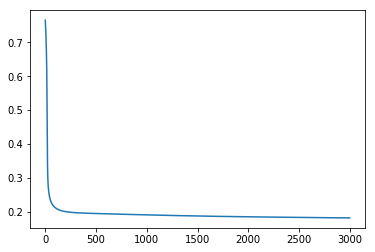

In [40]:
act = Activation()
activations = [act.get('linear'),act.get('sine'),act.get('sigmoid')]
# activations = [act.get('linear'),act.get('sigmoid'),act.get('linear')]

nn = NN((18,10,1),activations,0.001)
# nn = NN((11,6,1),activations,0.001)


error_hist = nn.compute(X_train, y_train, 3000)
plt.plot(error_hist)

In [41]:
nn.cache['a2'].shape

(1, 757)